<a href="https://colab.research.google.com/github/pkrodev/AI_Tutorial/blob/main/3/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__


'2.15.0'

In [66]:
(train_data, train_labels), (test_data, test_results) = load_data()

In [67]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [68]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [69]:
train_data=train_data/255.
test_data=test_data/255.

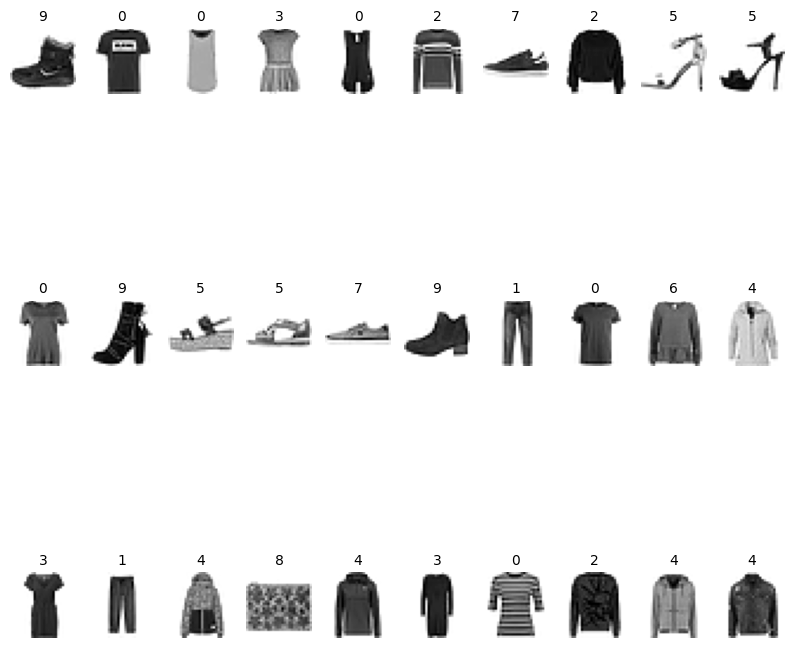

In [70]:
plt.figure(figsize=(10,10))
for i in range(1,31):
  plt.subplot(3,10,i)
  plt.axis('off')
  plt.imshow(train_data[i-1], cmap='gray_r')
  plt.title(train_labels[i-1], color='black', fontsize=10)
plt.show()


In [71]:
#train_labels = to_categorical(train_labels, num_classes=10)

In [72]:
from tensorflow.keras.regularizers import l2
model= Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

In [73]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [74]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_53 (Dense)            (None, 128)               100480    
                                                                 
 dense_54 (Dense)            (None, 64)                8256      
                                                                 
 dense_55 (Dense)            (None, 32)                2080      
                                                                 
 dense_56 (Dense)            (None, 16)                528       
                                                                 
 dense_57 (Dense)            (None, 10)                170       
                                                                 
Total params: 111514 (435.60 KB)
Trainable params: 11

In [75]:
history=model.fit(train_data, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5635 - accuracy: 0.8073
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3904 - accuracy: 0.8625
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3520 - accuracy: 0.8742
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3296 - accuracy: 0.8807
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8888
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8943
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2862 - accuracy: 0.8957
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.8988
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9036
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.257

In [76]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.563453,0.807283
1,0.390421,0.862483
2,0.351965,0.874233
3,0.329613,0.880700
4,0.310121,0.888750
5,0.295523,0.894333
6,0.286230,0.895750
7,0.274083,0.898750
8,0.264346,0.903567
9,0.257792,0.905767


from matplotlib import pyplot as plt
metrics['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
metrics['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

In [77]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [78]:
np.set_printoptions(threshold=np.inf)


print(model.predict(test_data)[:10])

313/313 [==============================] - 0s 1ms/step
[[0.000002416678 0.000000055652 0.00000003379  0.00003506901  0.000005110919 0.00012149677  0.000015470714 0.004118731    0.000025546651
  0.9956761     ]
 [0.000018124792 0.000000003059 0.9830762      0.000000034448 0.016526626    0.             0.0003789863   0.000000003847 0.00000000398
  0.            ]
 [0.000000000518 0.9999984      0.000000000065 0.000000010947 0.000000000025 0.000000000004 0.000000000027 0.             0.000001522332
  0.            ]
 [0.000000000007 0.9999991      0.000000000037 0.000000002371 0.000000000008 0.000000000142 0.000000000009 0.             0.000000834241
  0.            ]
 [0.07949821     0.000000035141 0.010626924    0.0008649022   0.0036668552   0.000000000326 0.905175       0.00000000928  0.0001676688
  0.000000301531]
 [0.000006217647 0.99989516     0.000000349297 0.000005613888 0.000000231038 0.000000025317 0.000000643383 0.000000000211 0.00009176533
  0.000000000006]
 [0.000000038916 0.

In [79]:
test_loss, test_acc = model.evaluate(test_data, test_results, verbose=2)

313/313 - 1s - loss: 0.3369 - accuracy: 0.8870 - 601ms/epoch - 2ms/step


In [80]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [82]:
predictions = model.predict(test_data)
predictions[:10]

313/313 [==============================] - 0s 1ms/step


array([[0.000002416678, 0.000000055652, 0.00000003379 , 0.00003506901 , 0.000005110919, 0.00012149677 , 0.000015470714, 0.004118731   ,
        0.000025546651, 0.9956761     ],
       [0.000018124792, 0.000000003059, 0.9830762     , 0.000000034448, 0.016526626   , 0.            , 0.0003789863  , 0.000000003847,
        0.00000000398 , 0.            ],
       [0.000000000518, 0.9999984     , 0.000000000065, 0.000000010947, 0.000000000025, 0.000000000004, 0.000000000027, 0.            ,
        0.000001522332, 0.            ],
       [0.000000000007, 0.9999991     , 0.000000000037, 0.000000002371, 0.000000000008, 0.000000000142, 0.000000000009, 0.            ,
        0.000000834241, 0.            ],
       [0.07949821    , 0.000000035141, 0.010626924   , 0.0008649022  , 0.0036668552  , 0.000000000326, 0.905175      , 0.00000000928 ,
        0.0001676688  , 0.000000301531],
       [0.000006217647, 0.99989516    , 0.000000349297, 0.000005613888, 0.000000231038, 0.000000025317, 0.000000643

In [88]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000002,0.000000,0.000000,0.000035,0.000005,0.000121,0.000015,0.004119,0.000026,0.995676
1,0.000018,0.000000,0.983076,0.000000,0.016527,0.000000,0.000379,0.000000,0.000000,0.000000
2,0.000000,0.999998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000
3,0.000000,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000
4,0.079498,0.000000,0.010627,0.000865,0.003667,0.000000,0.905175,0.000000,0.000168,0.000000


In [85]:
predictions_cls = np.argmax(predictions,axis=1)
predictions_cls[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [90]:
idx = 186 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == test_results[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (test_data[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

In [96]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(test_data):
    if predictions_cls[idx] != test_results[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 458 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[test_results[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (test_data[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)